# Crank-Nicolson method

The Schrodinger equation reads

\begin{equation}
i \hbar \frac{\partial \psi}{\partial t} = \hat{H} \psi 
\end{equation}

In one dimension if we discretize space and time we can write:

\begin{align}
&i \hbar \frac{\psi(x, t+h) - \psi(x, t)}{h} = \hat{H} \psi(x, t+h) \\ 
&\left(\frac{i \hbar}{h} - \hat{H} \right) \psi(x, t+h) = \hat{H} \psi(x,t) \\
& \psi(x, t+h) = \left(\frac{i \hbar}{h} - \hat{H} \right)^{-1} \hat{H} \psi(x,t)
\end{align}

Where $h$ denotes a time step. To solve the equation we merely have to compute the operator $\left(\frac{i \hbar}{h} - \hat{H} \right)^{-1} \hat{H}$.

By discretizing space with a step $a$ one can write:
\begin{equation}
\hat{H} \psi = \left( -\frac{\hbar^2}{2m} \frac{d^2}{dx^2} + V(x) \right) \psi =  -\frac{\hbar^2}{2ma^2}(\psi(x+a, t) + \psi(x-a,t) - 2 \psi(x, t)) + V(x) \psi(x,t)
\end{equation}

In the position basis and taking periodic boundary conditions we can write the operator in matrix form:
\begin{equation}
\hat{H} = -\frac{\hbar^2}{2ma^2}
\begin{pmatrix}
-2  \psi(0, t) & \psi(0,t) & 0 & \dots & \psi(a, t) \\
\psi(a, t) & -2 \psi(a,t) & \psi(a, t)  & 0 & \dots \\
0 & \psi(2a, t) & -2 \psi(2a, t) & \psi(2a,t) & \dots \\
\vdots & \ddots & \ddots & \ddots & \ddots \\
\psi(L-a, t) & \dots & \dots & \psi(L-2a,t) & -2 \psi(L-a, t)
\end{pmatrix}
+
\begin{pmatrix}
V(0) & 0 & 0 & \dots & 0 \\
0 & V(a) & 0  & 0 & \dots \\
0 & 0 & V(2a) & 0 & \dots \\
\vdots & \ddots & \ddots & \ddots & \ddots \\
0 & \dots & \dots & 0 & V(L-a)
\end{pmatrix}
\end{equation}

In [9]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as linalg

In [10]:
def kth_diagonal_indices(size, k):
    rows, cols = np.indices((size, size))
    row_vals = np.diag(rows, k = k)
    col_vals = np.diag(cols, k = k)
    
    return row_vals, col_vals

In [23]:
def barrier(x):
    if x>0.5 and x<1.5:
        return 4
    else:
        return 0

In [24]:
dx = 0.01
dt = 0.01
L = 2
T = 2

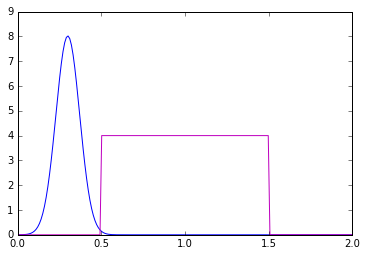

In [25]:
x = np.linspace(0, 2, num = int(L/dx))
psi = np.zeros(shape = (int(L/dx), int(T/dt)))
psi[:, 0] = np.exp(-(x-0.3)**2/0.01)
psi[:, 0] = psi[:, 0]/np.sum(dx*psi[:, 0]**2)
V = np.vectorize(barrier)(x)
plt.plot(x, psi)
plt.plot(x, V)
plt.show()

In [26]:
H = np.matrix(np.zeros( shape = (int(L/dx), int(L/dx)) ))

#    Diagonal elements
np.fill_diagonal(H[:, :], psi[:, 0]/dx**2 + V)

#    Off diagonal elements
H[kth_diagonal_indices(int(L/dx), 1)] = -psi[0:int(L/dx)-1, 0]/(2*dx**2)
H[kth_diagonal_indices(int(L/dx), -1)] = -psi[0:int(L/dx)-1, 0]/(2*dx**2)

#   Elements due to boundary conditions
H[int(L/dx)-1, 0] = -psi[0, 0]/(2*dx**2)
H[0, int(L/dx)-1] = -psi[0, 0]/(2*dx**2)

In [27]:
A = 1j/dt - H

In [28]:
A.I

LinAlgError: singular matrix

In [29]:
H[H.T != H]

matrix([], shape=(1, 0), dtype=float64)